# Project Name : - Credit Card Default Prediction .

## 1) Problem statement .

* This dataset comprises of Credit Card Default Dataset taken from Kaggle . 
* Link of the dataset is as follows :- https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset .
* Finacial oragnizations can predict the Credit Card Default for it's customers based on input features .
* This Prediction results can be useful for them as it might help them to enhance the limit,or reduce the limit or stop the limit to credit card holders based on the prediction .

## 2) Data Collection.
* This dataset comprises of Flight Fare data taken from Kaggle
* The data consists of 25 column and 30,000 rows.

### 2.1 Import Data and Required Packages

**Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.pipeline import Pipeline 
import pickle
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,accuracy_score,recall_score,precision_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import logging
logging.basicConfig(level = logging.INFO, filename = 'app.log', filemode = 'w', format = '%(asctime)s - %(levelname)s - %(message)s')

# **Loading the Credit Card Default DataSet**

In [2]:
logging.info('Reading CSV file')
df=pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


**About Dataset**

**Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.**

**Content**

**There are 25 variables:**

**ID: ID of each client .**

**LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit .**

**SEX: Gender (1=male, 2=female) .**

**EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) .**

**MARRIAGE: Marital status (1=married, 2=single, 3=others) .**

**AGE: Age in years .**

**PAY_1: Repayment status in September, 2005 (-2= no credit to pay,-1=pay duly,0= minimum payment is met, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above) .**

**PAY_2: Repayment status in August, 2005 (scale same as above) .**

**PAY_3: Repayment status in July, 2005 (scale same as above) .**

**PAY_4: Repayment status in June, 2005 (scale same as above) .**

**PAY_5: Repayment status in May, 2005 (scale same as above) .**

**PAY_6: Repayment status in April, 2005 (scale same as above) .**

**BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) .**

**BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) .**

**BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) .**

**BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) .**

**BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) .**

**BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) .**

**PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) .**

**PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) .**

**PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) .**

**PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) .**

**PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) .**

**PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) .**

**default.payment.next.month: Default payment (1=yes, 0=no) .**

# **There are categorical columns which are encoded as Follows**



**SEX: Gender**

    1 = Male    
    2 = Female
    
**EDUCATION:**

    1 = graduate school     
    2 = university     
    3 = high school     
    4 = others     
    5 = unknown     
    6 = unknown
    
**MARRIAGE: Marital status**

    1 = married
    2 = single
    3 = others
    
**PAY_1,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)**

    -2= no credit to pay
    -1= pay duly
    0= minimum payment is met
    1 = payment delay for one month
    2 = payment delay for two months
    ... 
    8 = payment delay for eight months
    9 = payment delay for nine months and above
    

**Data Cleaning**

In [4]:
#Dropping the Id column as it will be of no use to us in further EDA & Model Building

In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.rename(columns={"PAY_0":"PAY_1",'default.payment.next.month':'defaulter_or_not'},inplace=True)

**Shape of the DataSet**

In [7]:
df.shape

(30000, 24)

**Summary of the DataSet**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LIMIT_BAL         30000 non-null  float64
 1   SEX               30000 non-null  int64  
 2   EDUCATION         30000 non-null  int64  
 3   MARRIAGE          30000 non-null  int64  
 4   AGE               30000 non-null  int64  
 5   PAY_1             30000 non-null  int64  
 6   PAY_2             30000 non-null  int64  
 7   PAY_3             30000 non-null  int64  
 8   PAY_4             30000 non-null  int64  
 9   PAY_5             30000 non-null  int64  
 10  PAY_6             30000 non-null  int64  
 11  BILL_AMT1         30000 non-null  float64
 12  BILL_AMT2         30000 non-null  float64
 13  BILL_AMT3         30000 non-null  float64
 14  BILL_AMT4         30000 non-null  float64
 15  BILL_AMT5         30000 non-null  float64
 16  BILL_AMT6         30000 non-null  float6

In [9]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_or_not
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
df.isnull().sum()

LIMIT_BAL           0
SEX                 0
EDUCATION           0
MARRIAGE            0
AGE                 0
PAY_1               0
PAY_2               0
PAY_3               0
PAY_4               0
PAY_5               0
PAY_6               0
BILL_AMT1           0
BILL_AMT2           0
BILL_AMT3           0
BILL_AMT4           0
BILL_AMT5           0
BILL_AMT6           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
defaulter_or_not    0
dtype: int64

**Proportion of count data for each columns**

In [11]:
for col in df:
    print(df[col ].value_counts(normalize=True)*100)
    print('----------------------------')

50000.0      11.216667
20000.0       6.586667
30000.0       5.366667
80000.0       5.223333
200000.0      5.093333
               ...    
730000.0      0.006667
1000000.0     0.003333
327680.0      0.003333
760000.0      0.003333
690000.0      0.003333
Name: LIMIT_BAL, Length: 81, dtype: float64
----------------------------
2    60.373333
1    39.626667
Name: SEX, dtype: float64
----------------------------
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64
----------------------------
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64
----------------------------
29    5.350000
27    4.923333
28    4.696667
30    4.650000
26    4.186667
31    4.056667
25    3.953333
34    3.873333
32    3.860000
33    3.820000
24    3.756667
35    3.710000
36    3.693333
37    3.470000
39    3.180000
38    3.146667
23    3.103333
40    2.900000
41    2.746667
42    2.646667
44 

# Categorical Features

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

## Multivariate Analysis

### Check Multicollinearity for Categorical features

* Multivariate analysis is the analysis of more than one variable.

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e defaulter_or_not**

In [12]:
categorical_features=[i for i in df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6']]]

In [13]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['defaulter_or_not'],df[feature]))[1] <0.05:
        chi2_test.append('Rejet Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,SEX,Rejet Null Hypothesis
1,EDUCATION,Rejet Null Hypothesis
2,MARRIAGE,Rejet Null Hypothesis
3,PAY_1,Rejet Null Hypothesis
4,PAY_2,Rejet Null Hypothesis
5,PAY_3,Rejet Null Hypothesis
6,PAY_4,Rejet Null Hypothesis
7,PAY_5,Rejet Null Hypothesis
8,PAY_6,Rejet Null Hypothesis


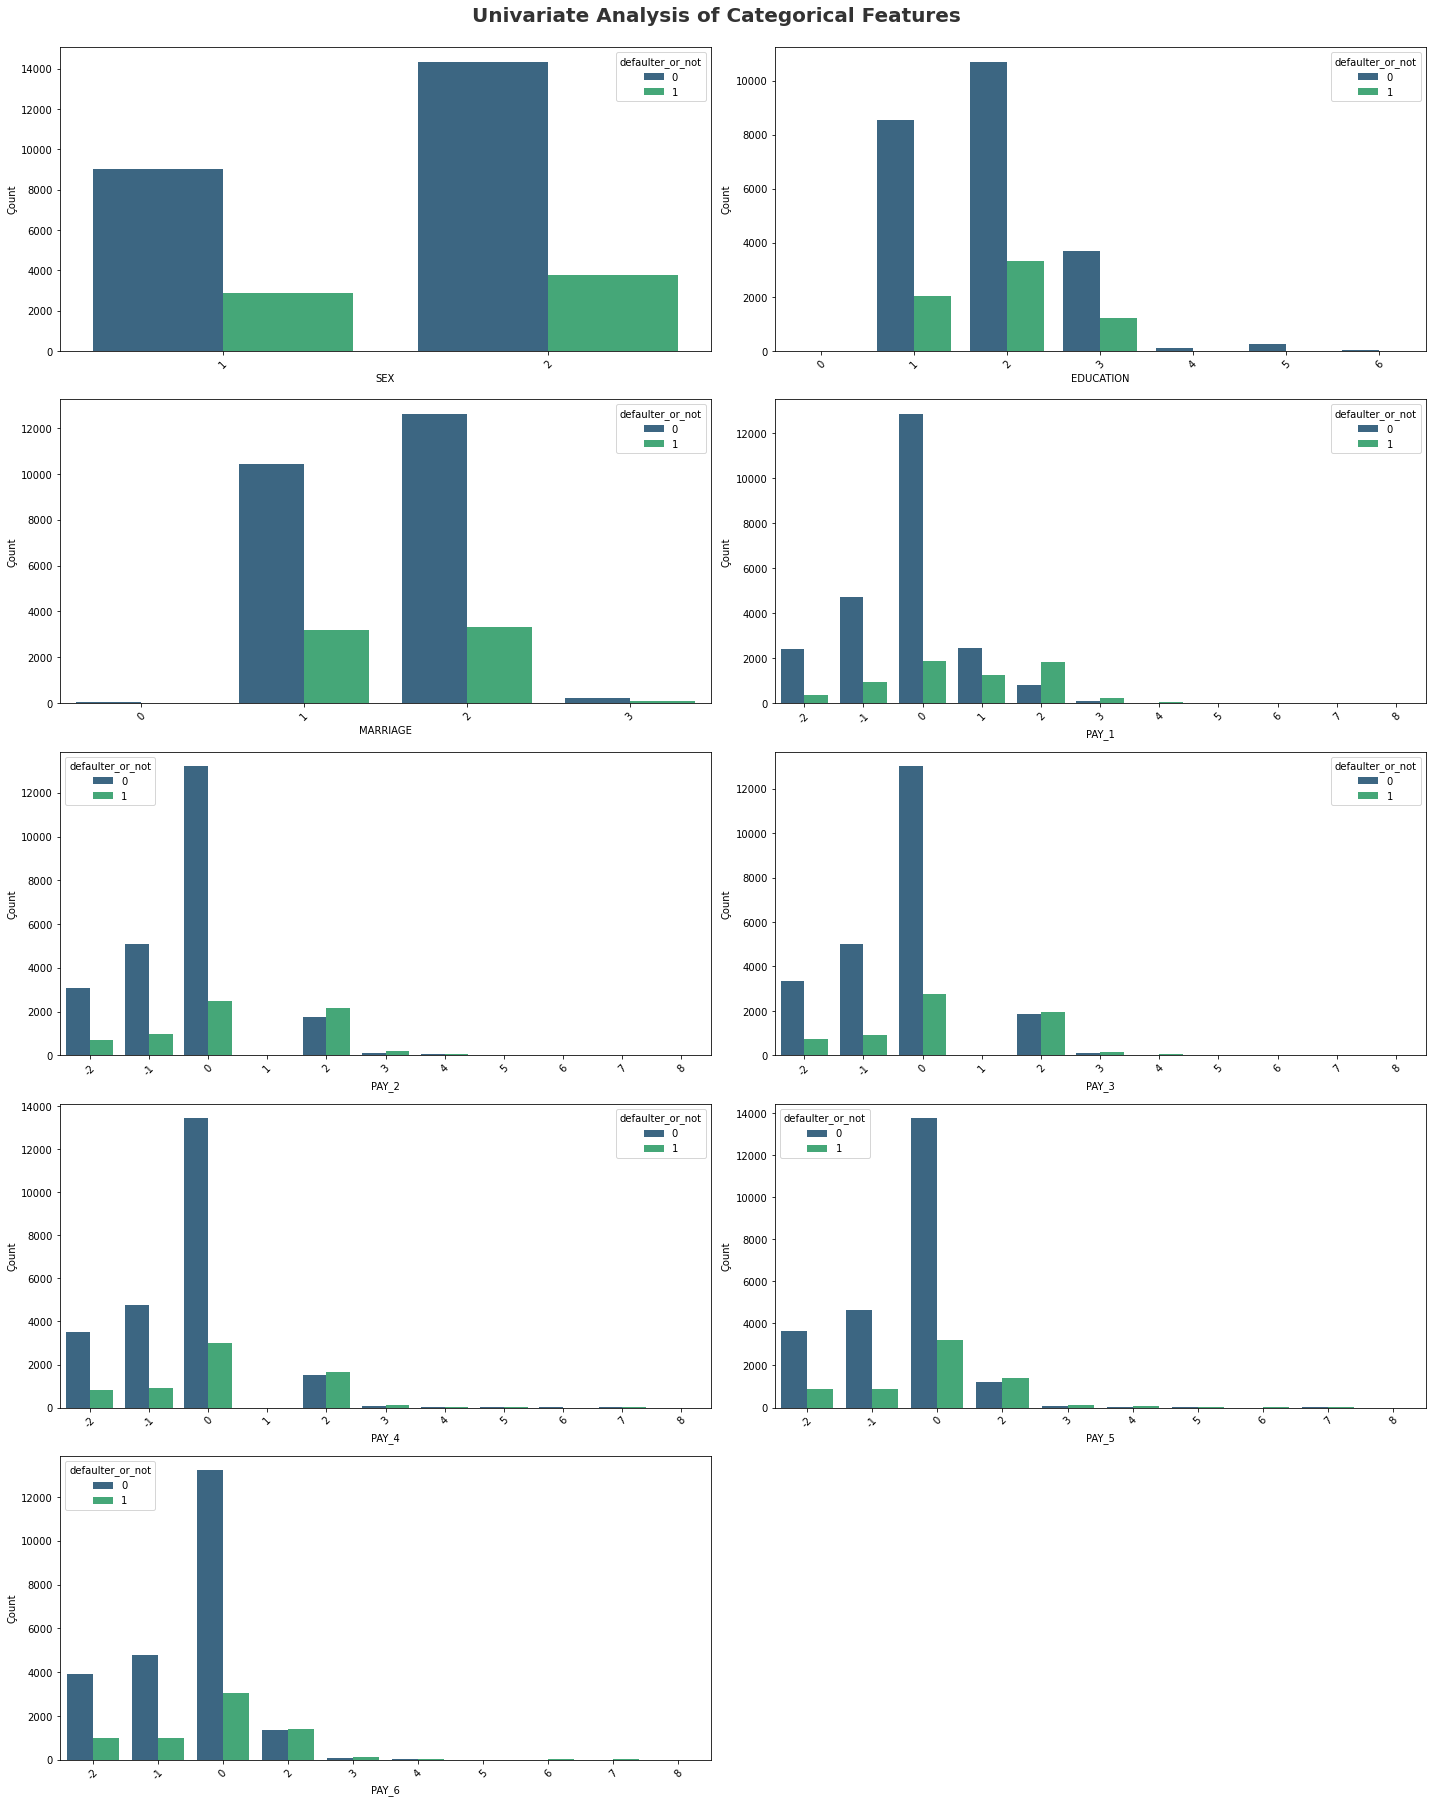

In [14]:
plt.figure(figsize=(20,25))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
categorical = [ 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6']
for i in range(0, len(categorical)):
    plt.subplot(5,2,i+1)
    sns.countplot(x=df[categorical[i]],hue=df['defaulter_or_not'],palette='viridis')
    plt.xlabel(categorical[i])
    plt.ylabel('Çount')
    plt.xticks(rotation=45)
    plt.tight_layout()

**Meaning of X axis numeric values is given below:-**

**SEX: Gender**

1 = Male    
2 = Female

**EDUCATION:**

1 = graduate school     
2 = university     
3 = high school     
4 = others     
5 = unknown     
6 = unknown

**MARRIAGE: Marital status**

1 = married
2 = single
3 = others

**PAY_1,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)**

-2= no credit to pay

-1= pay duly

0 = minimum payment is met

1 = payment delay for one month

2 = payment delay for two months

3 = payment delay for three months

4 = payment delay for four months

5 = payment delay for five months

6 = payment delay for six months

7 = payment delay for seven months

8 = payment delay for eight months

9 = payment delay for nine months and above

**Defaulter or not**

0 = Non Defaulters

1 =  Defauters

# **Visualizing the Data**

# **Limit Balance**

In [15]:
df["LIMIT_BAL"].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

<Figure size 1008x288 with 0 Axes>

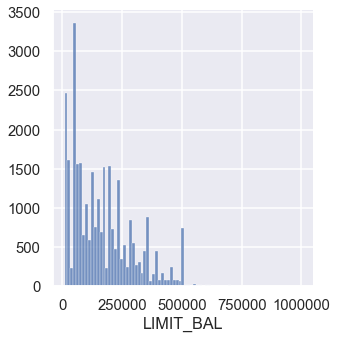

In [16]:
sns.set(rc={'figure.figsize' : (15,15)})
sns.set_context('talk',font_scale=0.9)
plt.figure(figsize=(14,4))
sns.displot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain',axis='x')
plt.ylabel('')
plt.show()

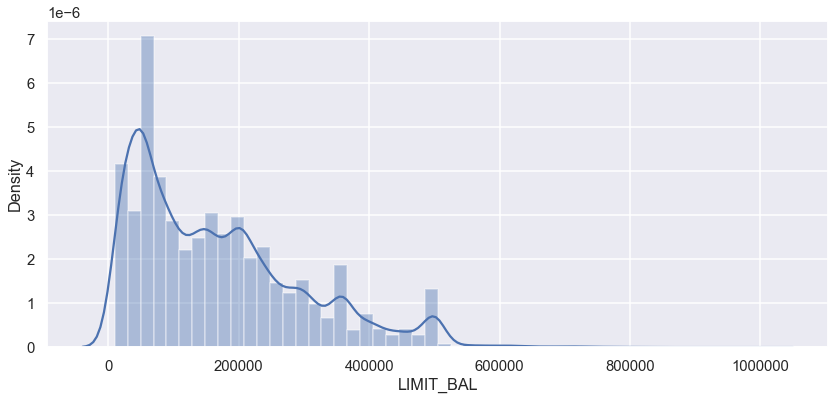

In [17]:
plt.figure(figsize=(14,6))
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') 
plt.show()

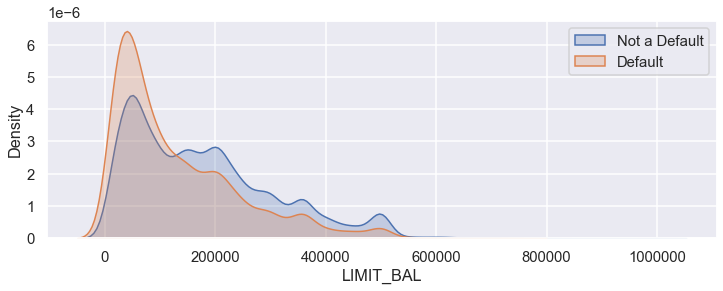

In [18]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['defaulter_or_not'] == 0),"LIMIT_BAL"],label="Not a Default" ,shade=True,)
sns.kdeplot(df.loc[(df['defaulter_or_not'] == 1),"LIMIT_BAL"],label="Default" ,shade=True)
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()

<AxesSubplot:xlabel='LIMIT_BAL'>

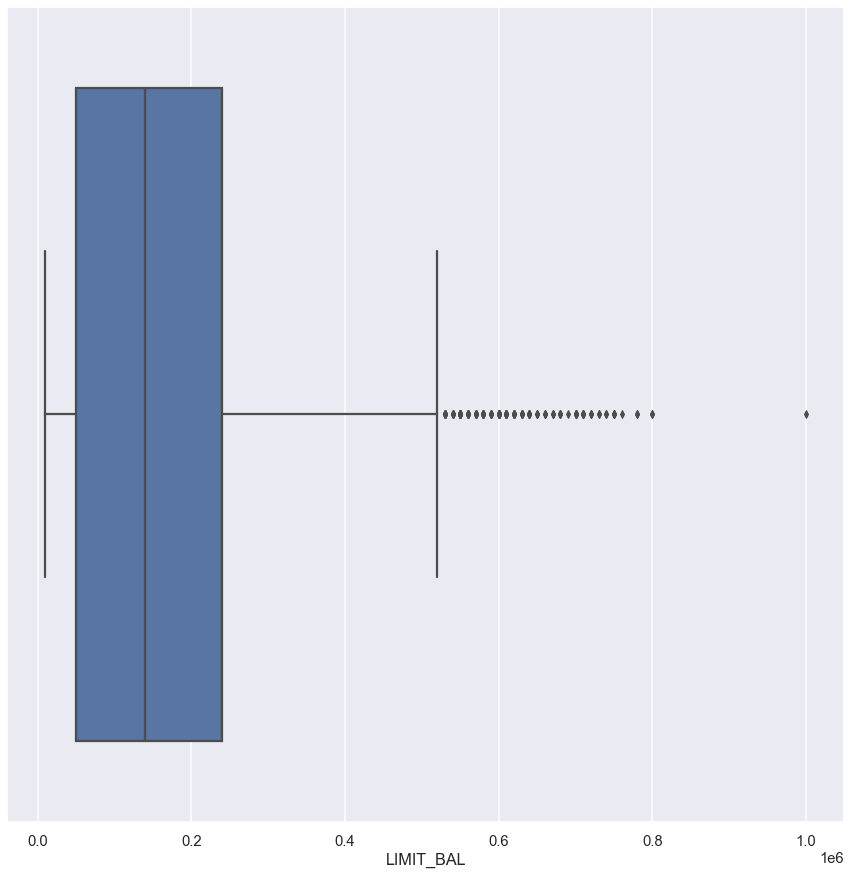

In [19]:
sns.boxplot(df["LIMIT_BAL"])

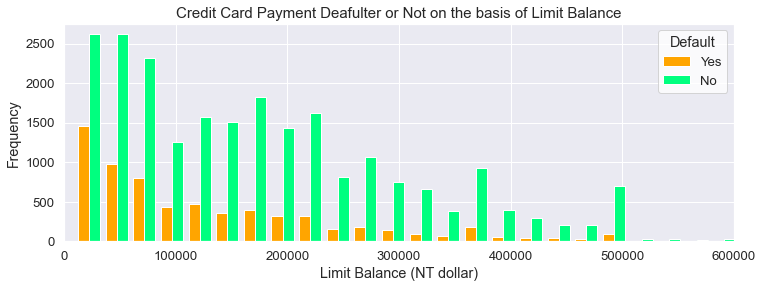

In [20]:
defaulter = list(df[df['defaulter_or_not'] == 1]['LIMIT_BAL'])
non_defaulter = list(df[df['defaulter_or_not'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
plt.hist([defaulter, non_defaulter], bins = 40, color=['orange', 'springgreen'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('Credit Card Payment Deafulter or Not on the basis of Limit Balance', size=15)
plt.show()
#plt.box(False)
#plt.savefig('ImageName', format='png', dpi=200, transparent=True)

In [21]:
print(df["LIMIT_BAL"].max())
print(df["LIMIT_BAL"].min())

1000000.0
10000.0


In [22]:
df['bin_limit']=pd.cut(df['LIMIT_BAL'],bins=[10000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000])

In [23]:
df['bin_limit'].value_counts()

(10000, 100000]      12005
(100000, 200000]      7880
(200000, 300000]      5059
(300000, 400000]      2759
(400000, 500000]      1598
(500000, 600000]       127
(600000, 700000]        56
(700000, 800000]        22
(900000, 1000000]        1
(800000, 900000]         0
Name: bin_limit, dtype: int64

In [24]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulter_or_not,bin_limit
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,"(10000, 100000]"
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,"(100000, 200000]"
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,"(10000, 100000]"
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,"(10000, 100000]"
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,"(10000, 100000]"


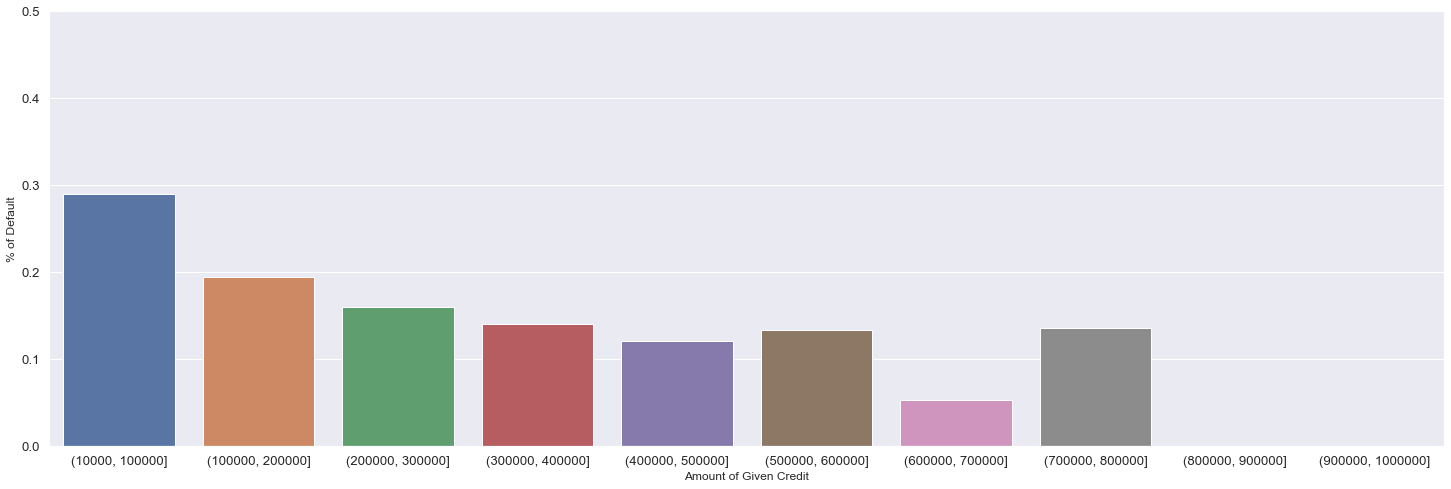

In [25]:
plt.figure(figsize=(25,8))
sns.barplot(x=df["bin_limit"],y=df["defaulter_or_not"]==1, ci = None)
plt.xlabel("Amount of Given Credit", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.show()

**Conclusion:-**
* 30% of Credit Card Holders are Deafault whose Limit is Below 1 Lakh .
* Credit Card holders with Limit below 1,00,000 has higher default as compared to Credit Card holders having a limit balance beyond Rs 1,00,000 .

# **SEX**

In [26]:
df['SEX'].value_counts(normalize=True)

2    0.603733
1    0.396267
Name: SEX, dtype: float64

In [27]:
df['defaulter_or_not'].groupby(df['SEX']).value_counts(normalize=True)

SEX  defaulter_or_not
1    0                   0.758328
     1                   0.241672
2    0                   0.792237
     1                   0.207763
Name: defaulter_or_not, dtype: float64

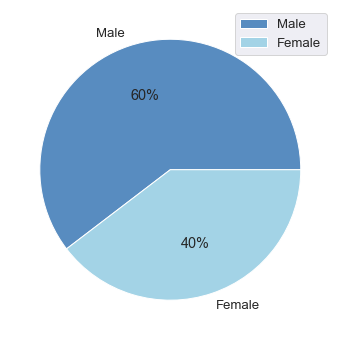

In [28]:
plt.figure(figsize = (15,6))
palette_color = sns.color_palette('RdYlBu_r')
keys=['Male','Female']
plt.pie(df["SEX"].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
plt.legend()
plt.show()

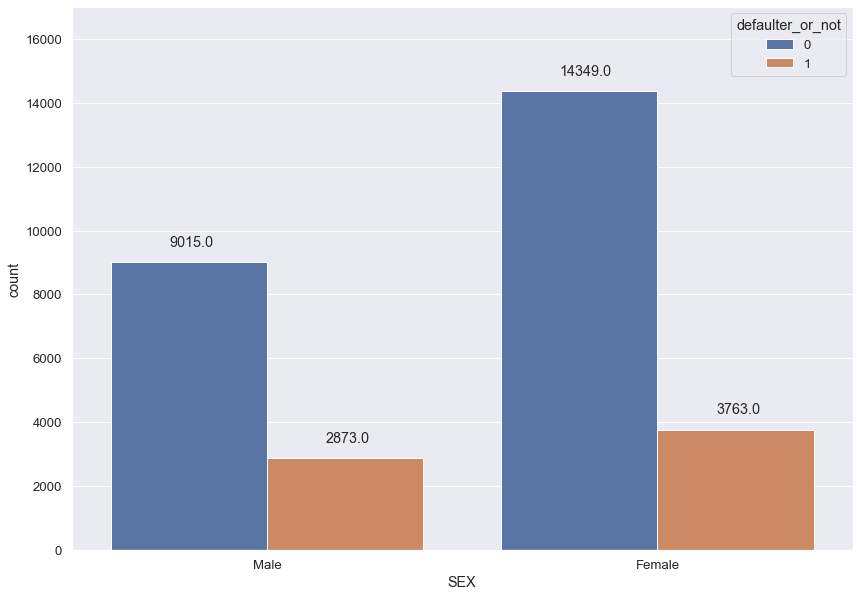

In [29]:
plt.figure(figsize=(14,10))
ax=sns.countplot('SEX',data=df,hue='defaulter_or_not')
plt.xticks(ticks=[1,0],labels=['Female','Male'])
plt.ylim(0,17000)
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()

**Conclusion:-**
* 60% Credit Card Holders are Male & 40% Credit Card Holders are Female .
* Female Defaulters are marginally high as compares to male .

# Education

In [30]:
#(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**Since 5 is representing unknown education & 6 is also representing unknown education,so we will replace 6 with 5,and also as we do not have any information about 0,so we will be replacing also it with 5**

In [31]:
df.loc[:,'EDUCATION']=df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION']=df.loc[:,'EDUCATION'].replace(6,5)

In [32]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [33]:
df['defaulter_or_not'].groupby(df['EDUCATION']).value_counts()

EDUCATION  defaulter_or_not
1          0                    8549
           1                    2036
2          0                   10700
           1                    3330
3          0                    3680
           1                    1237
4          0                     116
           1                       7
5          0                     319
           1                      26
Name: defaulter_or_not, dtype: int64

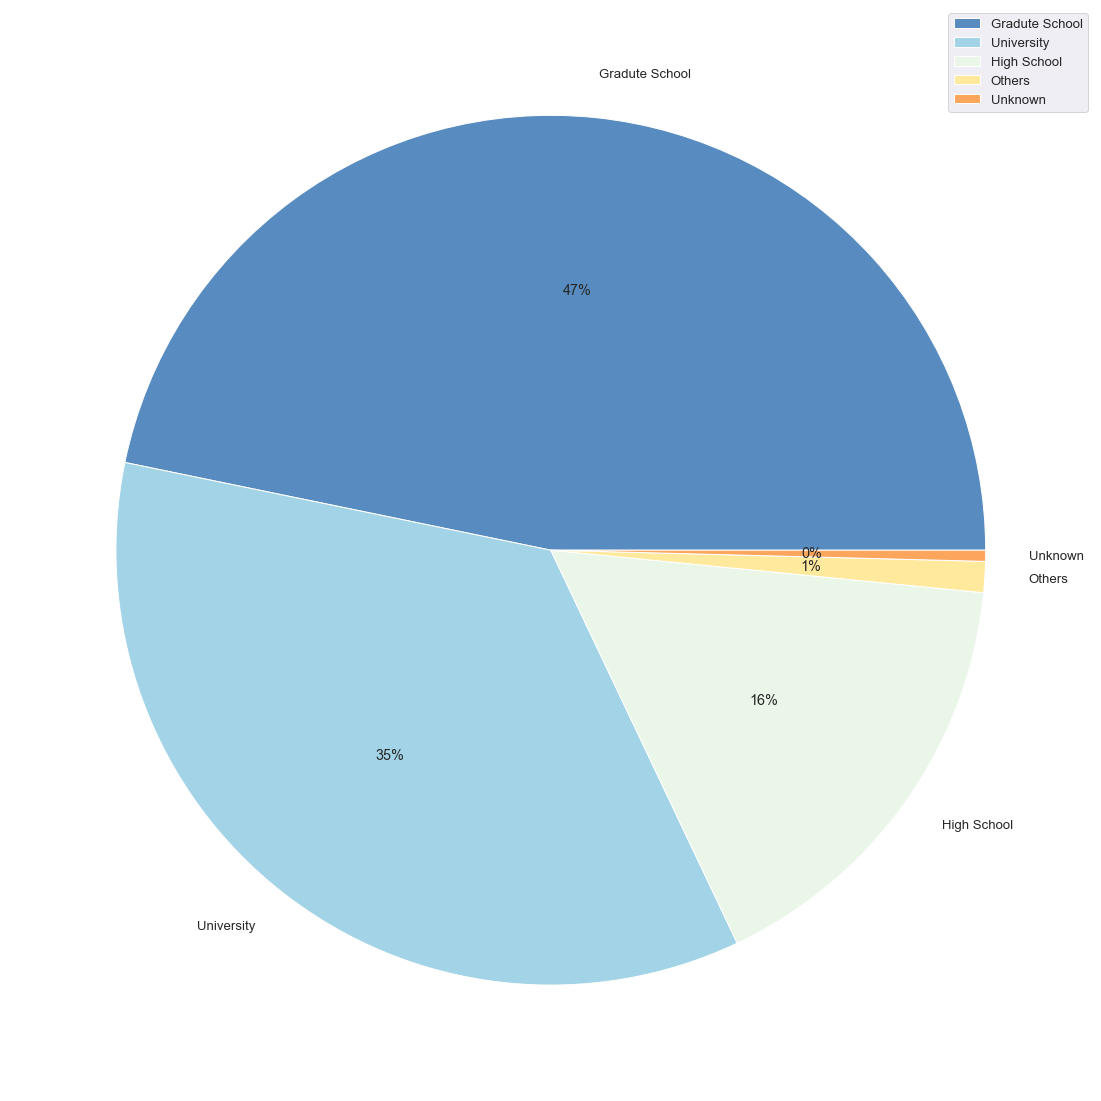

In [34]:
plt.figure(figsize = (20,20))
palette_color = sns.color_palette('RdYlBu_r')
keys=['Gradute School','University','High School','Others','Unknown']
plt.pie(df["EDUCATION"].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
plt.legend()
plt.show()

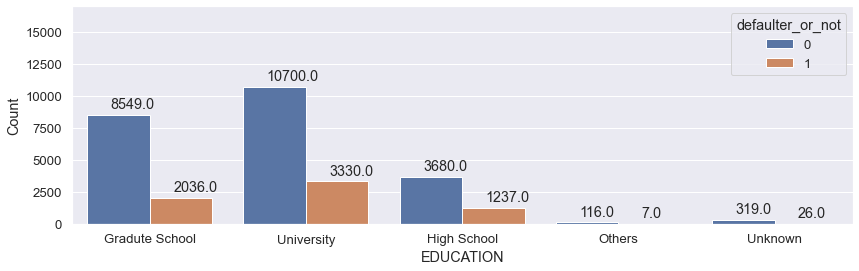

In [35]:
plt.figure(figsize=(14,4))
ax=sns.countplot("EDUCATION",data=df,hue='defaulter_or_not')
plt.xticks(ticks=[1,0,2,3,4],labels=['University','Gradute School','High School','Others','Unknown'])
plt.ylabel('Count')
plt.ylim(0,17000)
for i in ax.patches:
    ax.annotate('{:.1f}'.format(i.get_height()),(i.get_x()+0.15,i.get_height()+500))
plt.show()
#(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

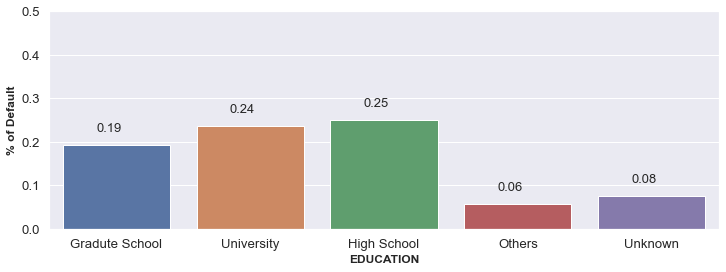

In [36]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = df["EDUCATION"], y = df["defaulter_or_not"]==1 , ci = None)
plt.xticks(ticks=[1,0,2,3,4],labels=['University','Gradute School','High School','Others','Unknown'])

plt.xlabel("EDUCATION", fontsize= 12,weight='bold')
plt.ylabel("% of Default", fontsize= 12,weight='bold')
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

**Conclusion:-**
* Majority of Credit Card Holders have Education as Graduate School,followed by University & High School Education .
* On the basis of Education High School defaulters are high followed by University & Graduate School .

# **MARITAL STATUS**

In [37]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [38]:
df['defaulter_or_not'].groupby(df['MARRIAGE']).value_counts()

MARRIAGE  defaulter_or_not
0         0                      49
          1                       5
1         0                   10453
          1                    3206
2         0                   12623
          1                    3341
3         0                     239
          1                      84
Name: defaulter_or_not, dtype: int64

In [39]:
df['defaulter_or_not'].groupby(df['MARRIAGE']).value_counts(normalize=True)

MARRIAGE  defaulter_or_not
0         0                   0.907407
          1                   0.092593
1         0                   0.765283
          1                   0.234717
2         0                   0.790717
          1                   0.209283
3         0                   0.739938
          1                   0.260062
Name: defaulter_or_not, dtype: float64

**Since we do not have any information about what 0 is representing ,so we will replace 0 with 3,and consider only 3 values under marital status i.e 1,2,3**

In [40]:
df.loc[:,'MARRIAGE']=df.loc[:,'MARRIAGE'].replace(0,3)

In [41]:
df['defaulter_or_not'].groupby(df['MARRIAGE']).value_counts(normalize=True)

MARRIAGE  defaulter_or_not
1         0                   0.765283
          1                   0.234717
2         0                   0.790717
          1                   0.209283
3         0                   0.763926
          1                   0.236074
Name: defaulter_or_not, dtype: float64

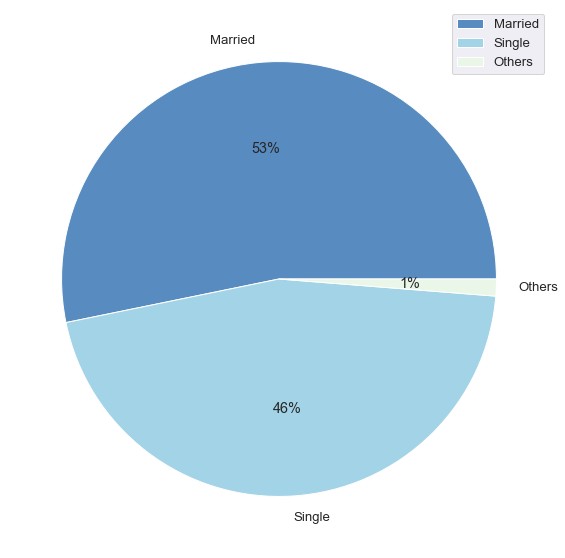

In [42]:
plt.figure(figsize = (20,10))
palette_color = sns.color_palette('RdYlBu_r')
keys=['Married','Single','Others']
plt.pie(df["MARRIAGE"].value_counts(), labels=keys, colors=palette_color, autopct='%.0f%%')
plt.legend()
plt.show()

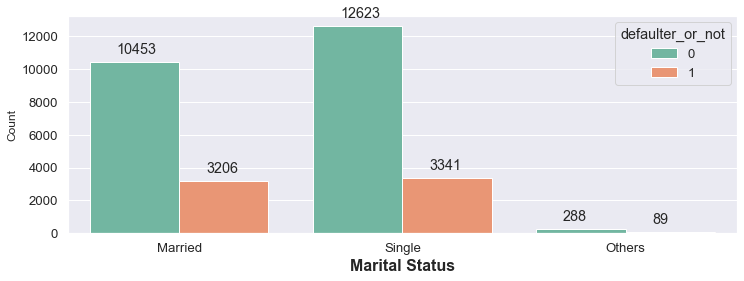

In [43]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="defaulter_or_not", palette = 'Set2')

plt.xlabel("Marital Status", fontsize= 16,weight='bold')
plt.ylabel("Count", fontsize= 12)
plt.xticks(ticks=[0,1,2],labels=['Married','Single','Others'])

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

**Conclusion:-**
* No of Credit Card Holders having Marital Status as Married are 56% followed by Single (46%) & Others(1%) .
* On the basis of Marital Status,Single Defaulters are marginally high as compared to married .

# **Age**

In [44]:
df['AGE'].min()


21

In [45]:
df['AGE'].max()

79

In [46]:
df['bin_age'] = pd.cut(df['AGE'],[15, 20,25, 30, 35, 40, 50, 60, 80])
print(df['bin_age'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
(15, 20]       0
Name: bin_age, dtype: int64


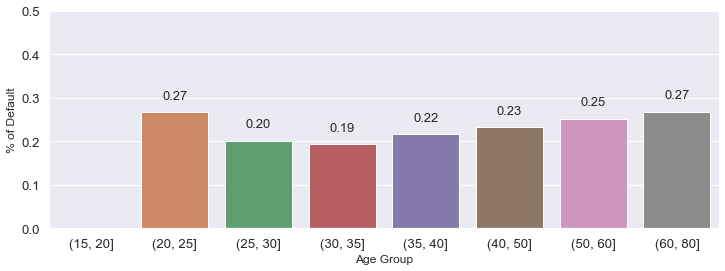

In [47]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = df["bin_age"], y = df["defaulter_or_not"]==1 , ci = None)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

**Conclusion:-**
* Age Group of 30 to 35 has lowest number of Credit Card payment Defaulters followed by Age Group of 25 to 30 and 35 to 40 .

* Age Group of 20 to 25 and 60 to 80 has highest number of credit card payment defaulters followed by Age Group of 50 to 60 and 40 to 50 .

# **Repayment status**

In [48]:
df[["PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].value_counts()

PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6
 0      0      0      0      0      0       9821
-2     -2     -2     -2     -2     -2       2109
-1     -1     -1     -1     -1     -1       1992
 1     -2     -2     -2     -2     -2        651
 2      2      2      2      2      2        530
                                            ... 
       -1      2      2      2      0          1
                            -1      0          1
                            -2     -1          1
                                   -2          1
 1     -1      2      2      2     -1          1
Length: 1106, dtype: int64

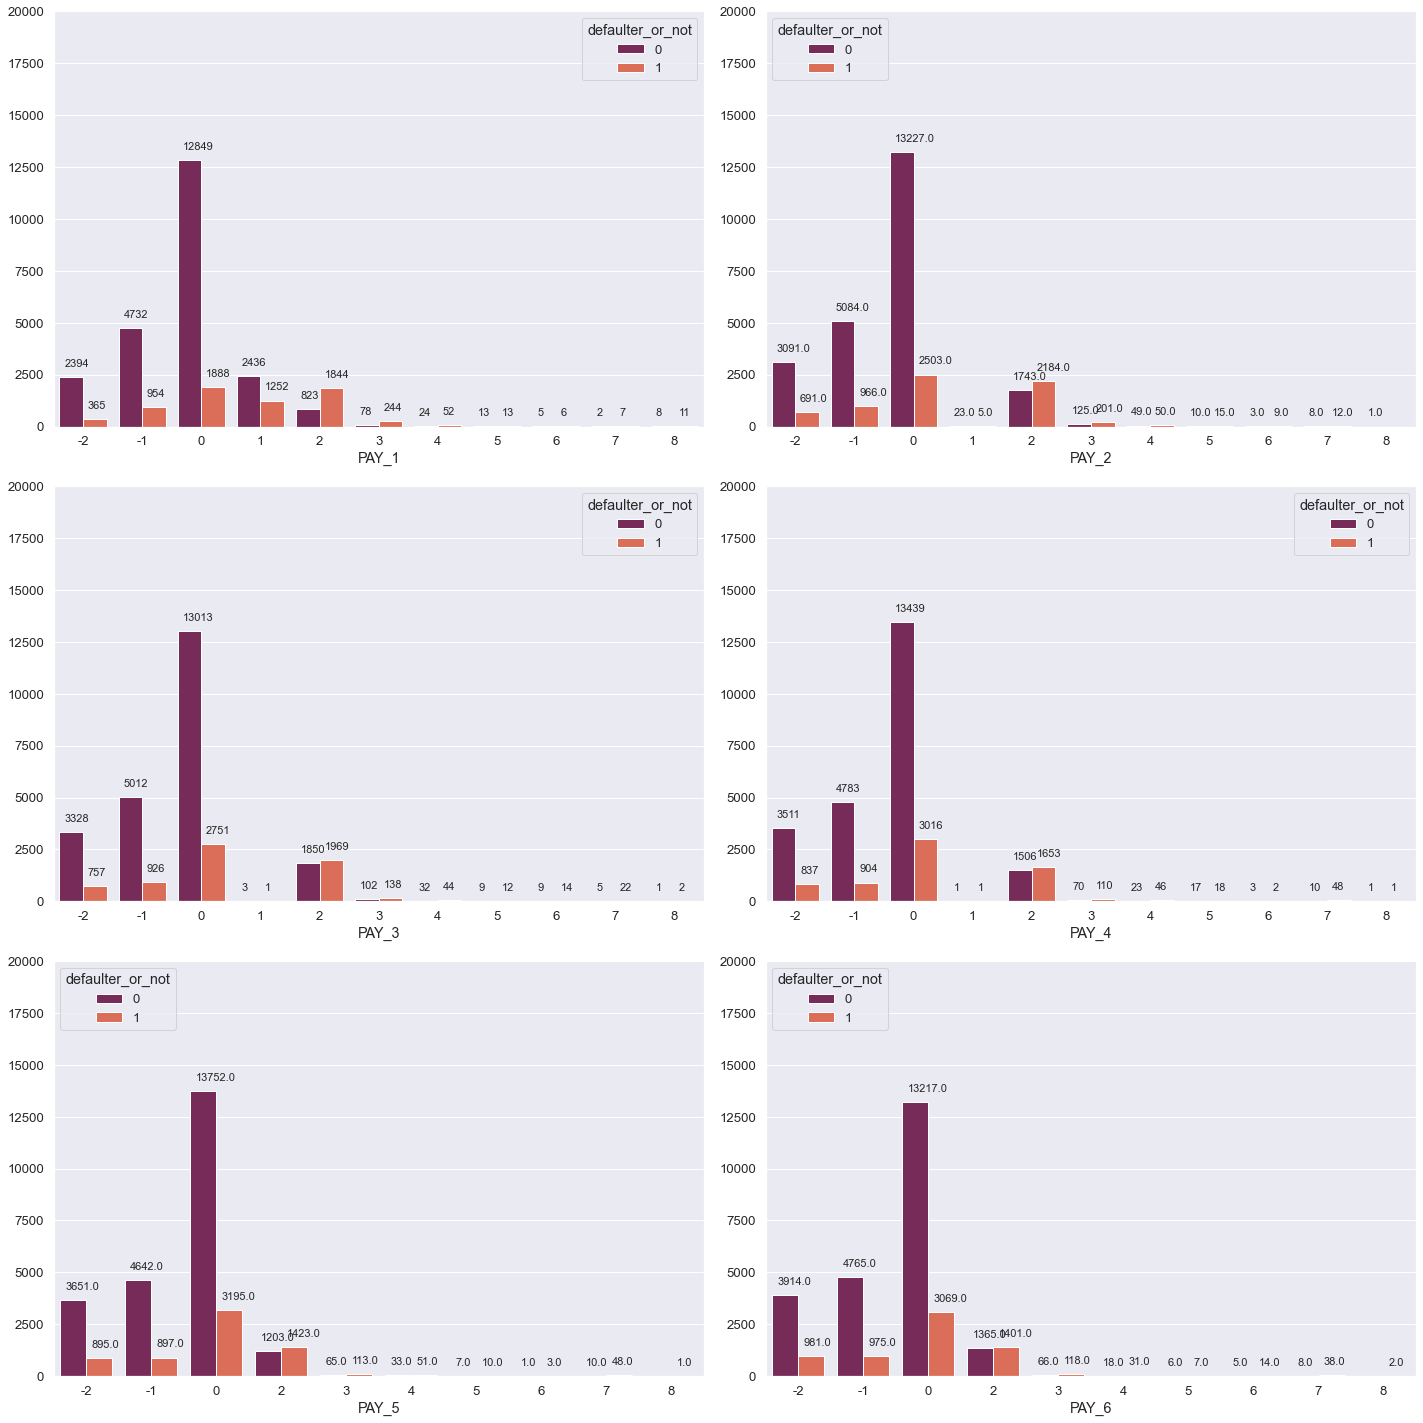

In [49]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(20,20))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df.loc[:,col], palette = 'rocket',data=df,hue='defaulter_or_not')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.08, p.get_height()+500), fontsize = 11)

plt.show()

**PAY_1,2,3,4,5,6: Repayment status in September 2005, August 2005, July 2005, June 2005, May 2005, April 2005 (respectivey)**

-2= no credit to pay

-1= pay duly

0= minimum payment is met

1 = payment delay for one month

2 = payment delay for two months

3 = payment delay for three months

4 = payment delay for four months

5 = payment delay for five months

6 = payment delay for six months

7 = payment delay for seven months

8 = payment delay for eight months

9 = payment delay for nine months and above

**Conclusion:-**
* From above we can conclude that majority of customers are paying  minimum amount due .

# IMBALANCED DATA

In [50]:
#Default payment (1=yes, 0=no)
df["defaulter_or_not"].value_counts()

0    23364
1     6636
Name: defaulter_or_not, dtype: int64

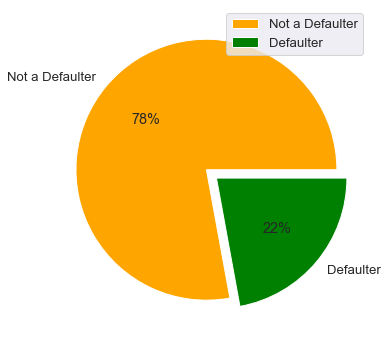

In [51]:
plt.figure(figsize = (15,6))
palette_color = sns.color_palette('rocket',as_cmap=True)
keys=['Not a Defaulter','Defaulter']
plt.pie(df["defaulter_or_not"].value_counts(), labels=keys, autopct='%.0f%%',colors = ["orange", "green"],explode = [0,0.1])
plt.legend()
plt.show()

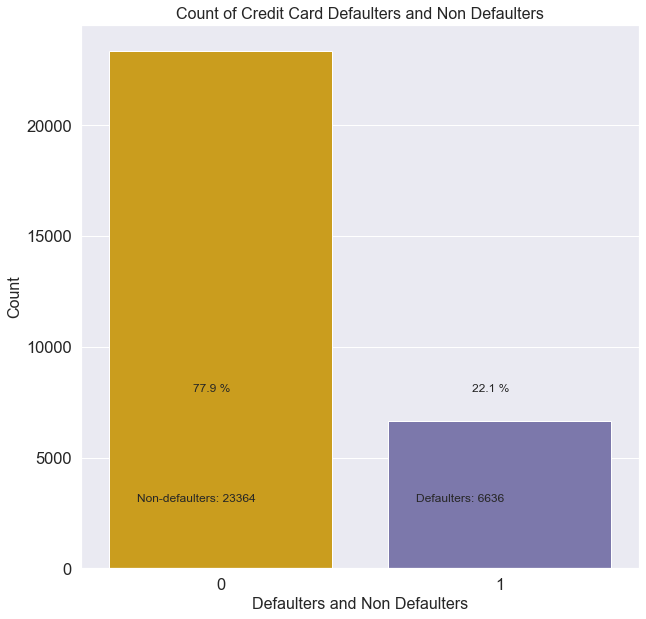

In [52]:
#the frequency of default & non default
defaulter=df.defaulter_or_not.sum()
non_defaulter=len(df)-defaulter

#converting into percentage
defaulter_percentage=round(defaulter/len(df)*100,1)
non_defaulter_percentage=round(non_defaulter/len(df)*100,1)

#plotting the graph
plt.figure(figsize=(10,10))
sns.set_context('notebook', font_scale=1.5)
sns.countplot('defaulter_or_not',data=df, palette="Dark2_r")
plt.annotate('Non-defaulters: {}'.format(non_defaulter), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Defaulters: {}'.format(defaulter), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(non_defaulter_percentage)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(defaulter_percentage)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('Count of Credit Card Defaulters and Non Defaulters', size=16)
plt.xlabel("Defaulters and Non Defaulters",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

**In above graph:-**
* 0 means Non Defaulters
* 1 means Defauters

**Conclusion:-**
* From the above proportion  we can see that there are around 22 % defaulters for credit card payments out of sample size of 30,000 credit card holders .

# **Multicolinearity**

* In simple words,we say there is a multicolinearity if there is a correlation between 2 or more features .

**Correlation:**
* Correlation is a technique for determining the link between two variables, which is useful in real life since it allows us to forecast the value of one variable using other factors that are connected with it. Because two variables are involved, it is a sort of bivariate statistic.

<AxesSubplot:>

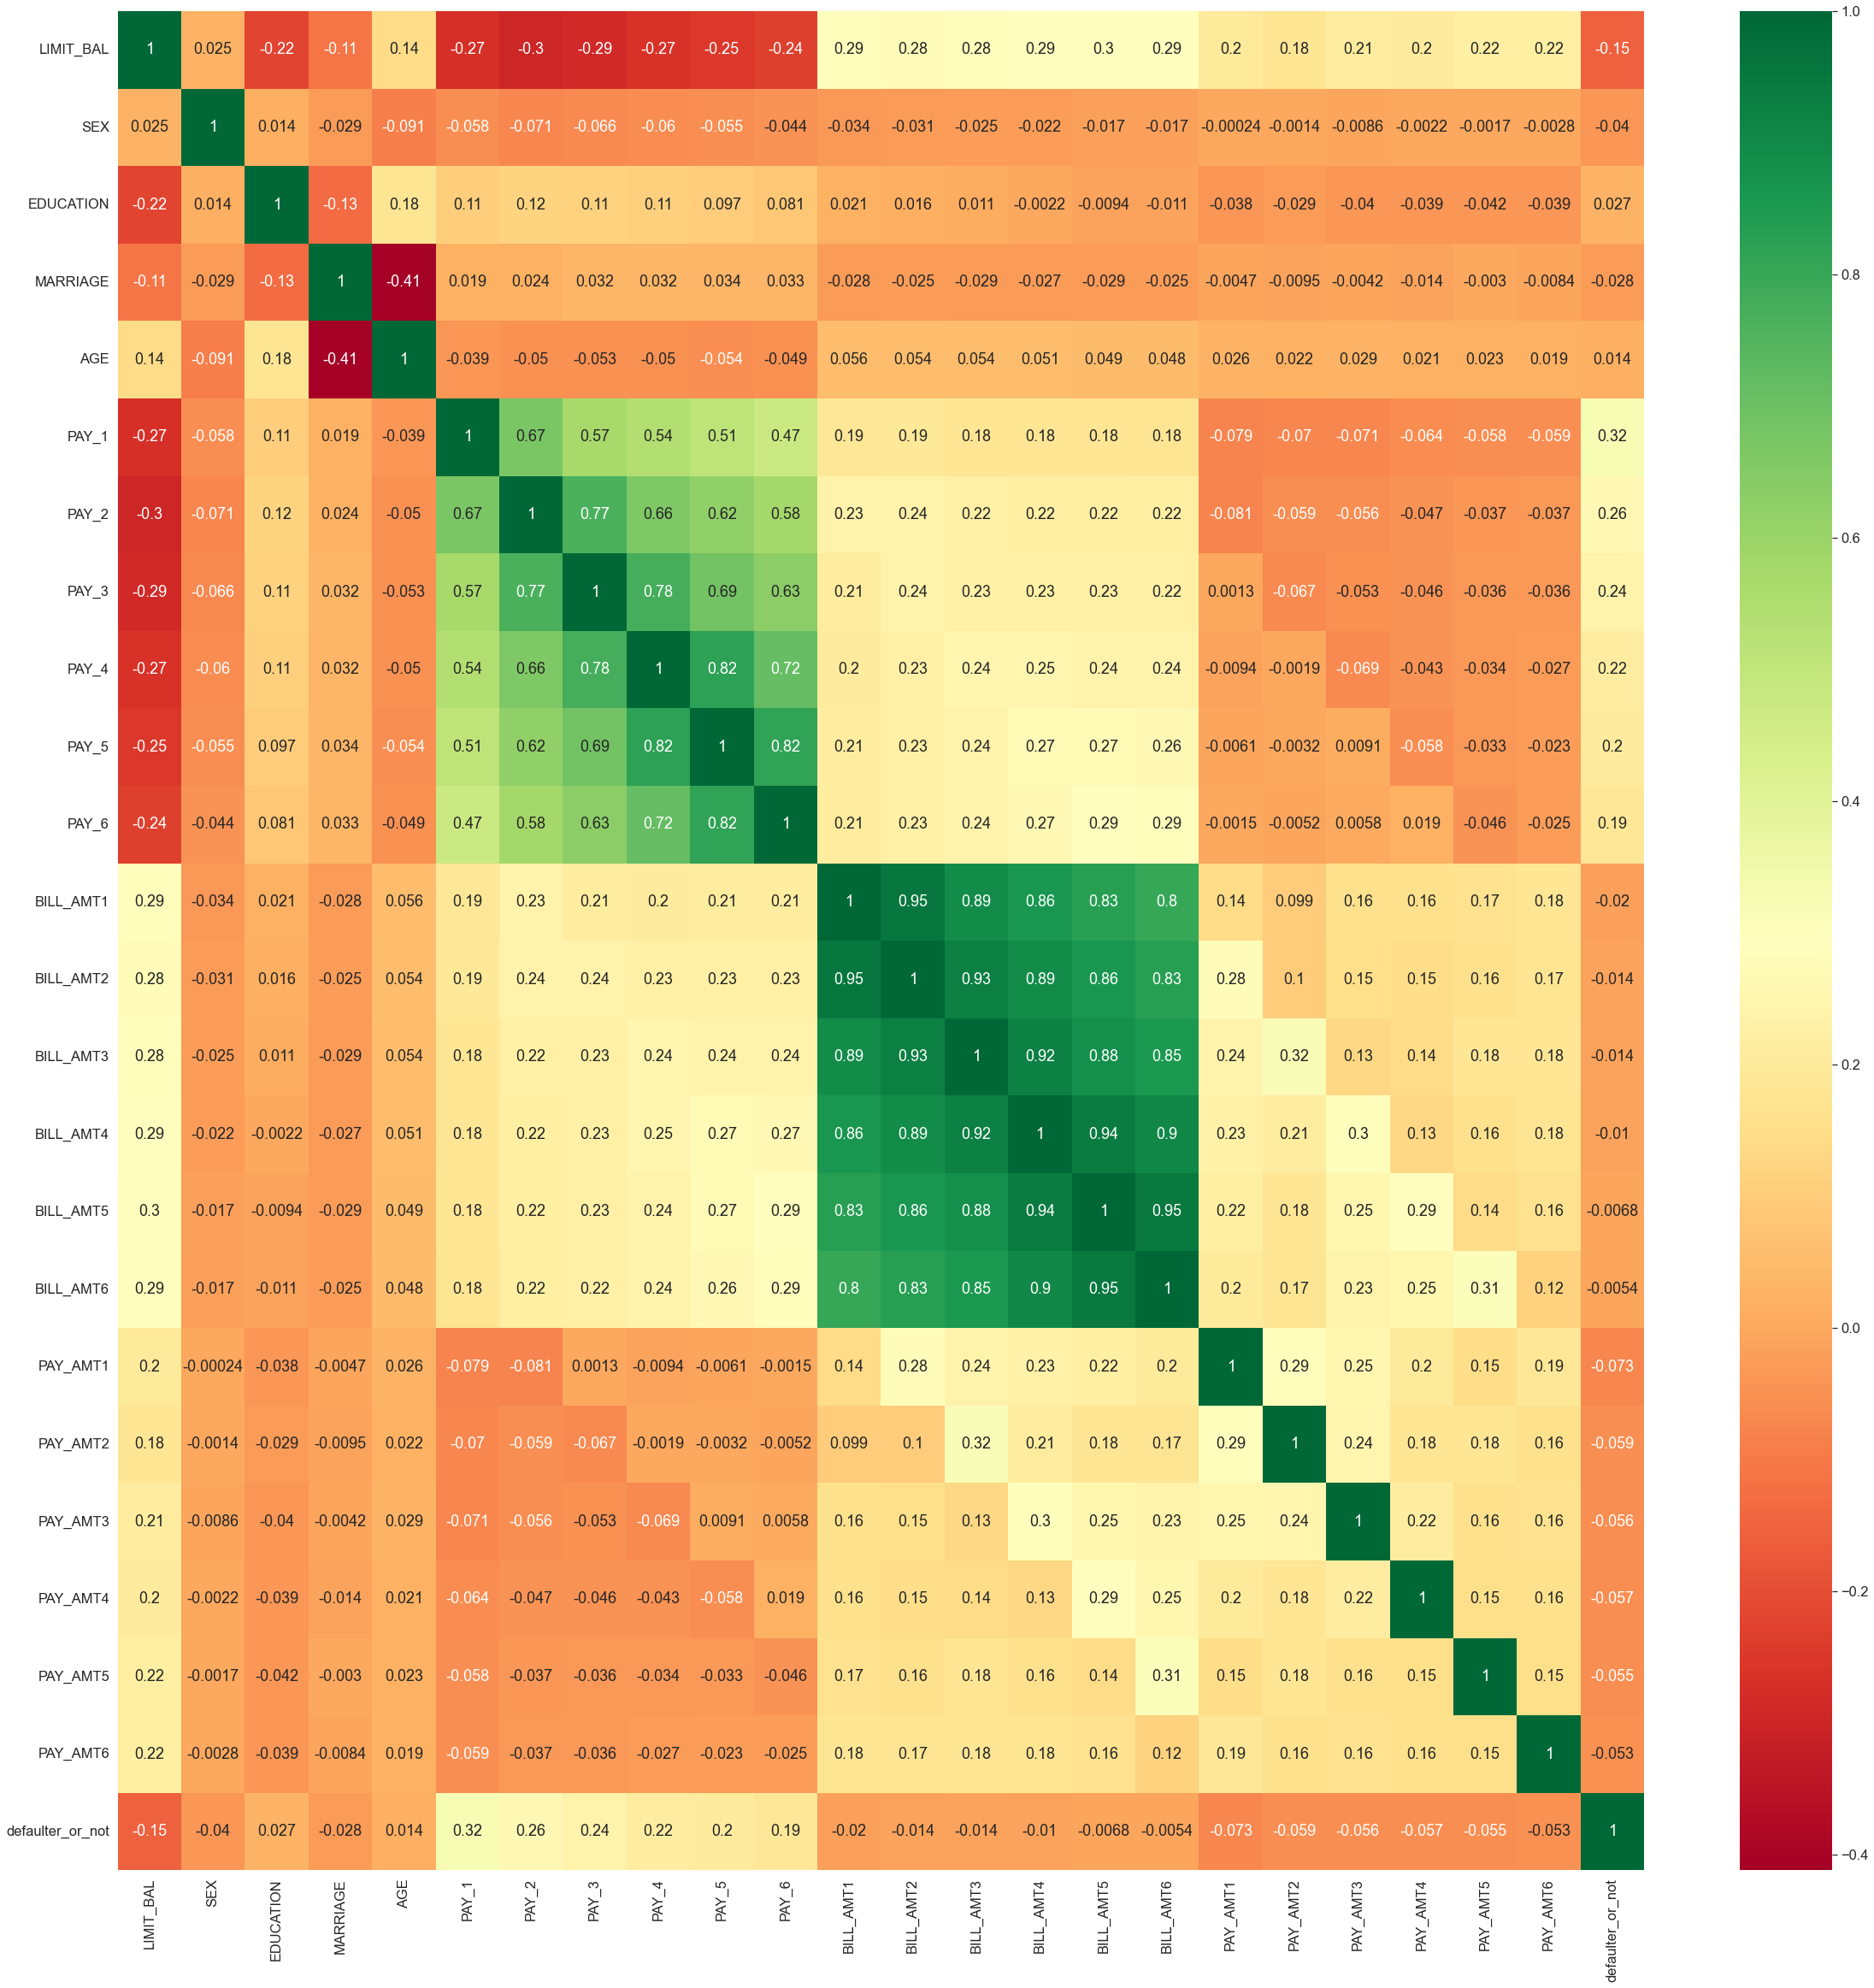

In [53]:
# Heatmap
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

**Conclusion:-**

* From the correlation heatmap above, it can be seen that there are some relationships between the feature columns, they are not entirely independent. 

* But in this scenario, there is a correlation because a customer who was not able to pay the bill for 1 month was again not able to pay it for the subsequent months and hence the correlation.

* Again for the bill amount column, the same has happened. If the customer was not able to pay the bill, then the bill amount almost remained the same, or if the customer was able to pay then the bill amount got reduced.

* We remove columns when they convey the same information. But here, dropping the columns shall result in the loss of bill and payment history data. So, we don’t need to drop any column although there is a correlation. 

### Defining X & Y

In [54]:
y = df['defaulter_or_not']
x = x=df.drop(['defaulter_or_not','bin_limit','bin_age'],axis=1)
x.head()

logging.info('Dividing features and target values')

In [55]:
x.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

### Spliting Dataset

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x.values, y.values, train_size=0.80, random_state=10)

logging.info('Dataset Split')

### Model Training

In [57]:
from sklearn.pipeline import Pipeline
#pipeline_lr = Pipeline([('model', LogisticRegression(max_iter=5000))])
pipeline_svc = Pipeline([('svc_model', SVC())])
pipeline_dc = Pipeline([('dc_model', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_model', RandomForestClassifier())])
pipeline_nb = Pipeline([('guass_model', GaussianNB())])
pipeline_xg = Pipeline([('xgboost', XGBClassifier())])


logging.info('Pipeline created for all models')

In [58]:
models = {
    #'logistic_regression' : pipeline_lr,
    'SVM' : pipeline_svc,
    'Decision Tree' : pipeline_dc,
    'Random Forest' : pipeline_rf,
    'Naive Bayes' : pipeline_nb,
    'XGBoost' : pipeline_xg
}

def model_prediction(name, model):
        model.fit(xtrain, ytrain)
        ypred = model.predict(xtest)
        precision, recall, f_beta, support = precision_recall_fscore_support(ytest, ypred, beta=2, pos_label=1, average='weighted', zero_division=1)
        auc = roc_auc_score(ytest, ypred)
        accuracy = accuracy_score(ytest, ypred)
        print(f"Model name : {name}")
        print(f"Accuracy is: {accuracy:.2f}")
        print(f"Precision is: {precision:.2f}")
        print(f"Recall is: {recall:.2f}")
        print(f"Fscore is: {f_beta:.2f}")
        print(f"AUC is: {auc:.2f}\n")
        
for name, model in models.items():
    model_prediction(name, model)

    logging.info('Function model_prediction called for model fit and metrics assessment')

Model name : SVM
Accuracy is: 0.78
Precision is: 0.83
Recall is: 0.78
Fscore is: 0.74
AUC is: 0.50

Model name : Decision Tree
Accuracy is: 0.73
Precision is: 0.73
Recall is: 0.73
Fscore is: 0.73
AUC is: 0.61

Model name : Random Forest
Accuracy is: 0.82
Precision is: 0.80
Recall is: 0.82
Fscore is: 0.81
AUC is: 0.66

Model name : Naive Bayes
Accuracy is: 0.38
Precision is: 0.73
Recall is: 0.38
Fscore is: 0.35
AUC is: 0.56



C:\Users\mehul\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model name : XGBoost
Accuracy is: 0.82
Precision is: 0.80
Recall is: 0.82
Fscore is: 0.81
AUC is: 0.66



***In this case we will consider recall for evaluating the credit card prediction model as under recall we evaluate out of all the predicted values how many are correctly predicted***

***As Random Forest & XGBoost are having same recall ,so we can consider any 1 of them.So will we considering Random Forest for Model Prediction***

**Saving the Model**

In [59]:
pickle.dump(pipeline_rf, open('credit_card_default.pkl','wb'))

logging.info('model exported as credit_default.pkl file')